In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [47]:
#loading the csv data
gold_data = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/08 Gold Price Prediciton/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [48]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [49]:
#number of rows and cols
gold_data.shape

(2290, 6)

In [50]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [63]:
#We will change the date and make it as index , as it is an object
gold_data = gold_data.drop(['Date'], axis=1)

In [64]:
#checking no. of missing values
gold_data.isnull().sum()

,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [65]:
#getting some statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation, 1. Positive , 2. Negative

In [66]:
correlation = gold_data.corr()

<Axes: >

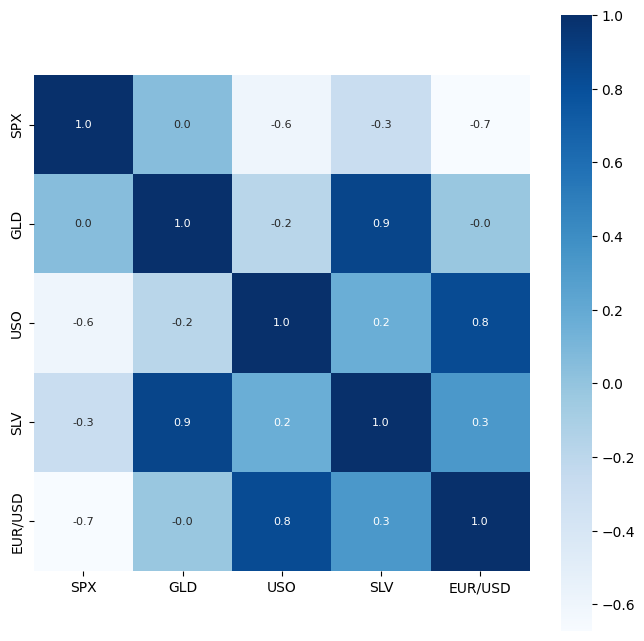

In [67]:
#constructing heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [68]:
#correlation values of GLD
correlation['GLD']

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


/tmp/ipython-input-2586810897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color="yellow")


<Axes: xlabel='GLD', ylabel='Density'>

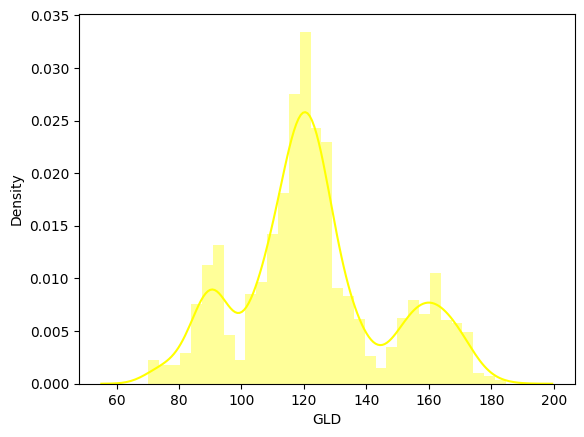

In [69]:
#check the distribution of the gold price
sns.distplot(gold_data['GLD'], color="yellow")

Splitting the features and target

In [73]:
x = gold_data.drop(['GLD'], axis=1)
y = gold_data['GLD']

Splitting into Training data and Test data

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2290, 4), (1832, 4), (458, 4), (1832,), (458,))

Model Training: Random Forest Regressor

In [77]:
regressor = RandomForestRegressor(n_estimators=100)

In [78]:
#Train the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [80]:
#prediction on Test Data
test_data_prediction = regressor.predict(x_test)
test_data_prediction

array([168.68369938,  81.91390018, 115.99500005, 127.59810102,
       121.04970124, 154.78669688, 150.37119857, 126.0485007 ,
       117.40749876, 126.19219992, 116.49680115, 170.983401  ,
       141.37519872, 167.91169844, 115.27379965, 117.53000028,
       137.92230299, 170.3913013 , 159.89460319, 163.02299949,
       155.16920023, 125.15080007, 174.80430004, 157.98650274,
       125.25750066,  93.68499974,  77.42860009, 120.48180024,
       119.11799987, 167.37959933,  88.09010003, 125.54210023,
        91.07830063, 117.72860012, 121.16299939, 136.62020119,
       115.39340121, 115.31760091, 145.89609921, 107.2923008 ,
       104.3006023 ,  87.14189814, 126.5614005 , 117.92690026,
       152.80769885, 119.59940004, 108.4699001 , 108.12249818,
        93.18730057, 127.04959783,  75.26820045, 113.67219923,
       121.0426    , 111.24639893, 118.95519905, 120.57579922,
       158.73840022, 167.7599019 , 147.07449704,  85.4918982 ,
        94.24670052,  86.8153988 ,  90.47139982, 118.94

In [83]:
#R square error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score*100)

R squared error :  98.98824135643017


Compare the actual values and predicted values

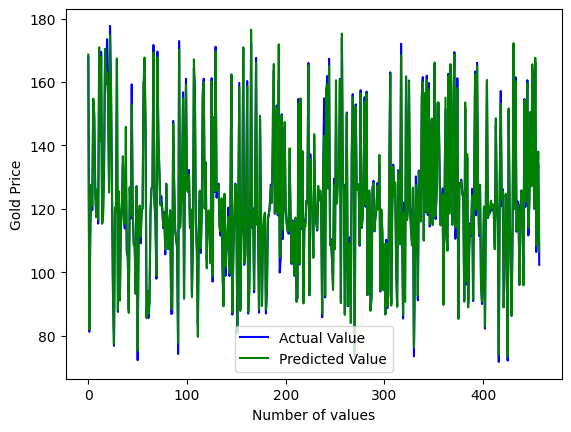

In [86]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()